In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [15]:
# Read in file 
data = pd.read_csv("../data/curated/feature_data.csv")

/var/folders/t7/dnx7ygys43vfq00ddy255g680000gn/T/ipykernel_76927/3594615362.py:2: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/curated/feature_data.csv")


In [16]:
data = data[['Weekly Rental Price','Postcode','Baths','Bedrooms','Parking','Crime Count','Count_Station','Income Per Person']]

In [17]:
data

,Weekly Rental Price,Postcode,Baths,Bedrooms,Parking,Crime Count,Count_Station,Income Per Person
0,60.0,3000,0,0,1,16212,45.0,11826.0
1,60.0,3000,0,0,1,16212,45.0,11826.0
2,60.0,3000,0,0,1,16212,45.0,11826.0
3,60.0,3000,0,0,1,16212,45.0,11826.0
4,60.0,3000,0,0,1,16212,45.0,11826.0
...,...,...,...,...,...,...,...,...
42824,420.0,3996,1,2,0,267,0.0,8846.0
42825,370.0,3996,1,2,1,267,0.0,8846.0
42826,370.0,3996,1,2,1,267,0.0,8846.0
42827,475.0,3996,2,3,1,267,0.0,8846.0


In [5]:
# Change Weekly Rental Price columns to first column
#price = data["Weekly Rental Price"]
#data = data.drop(["Weekly Rental Price"], axis = 1)
#data.insert(0, "Weekly Rental Price", price)

In [18]:
# Take out postcode column
postcode = data["Postcode"]

In [19]:
# Apply one hot encoding on Postcode
new_data = pd.get_dummies(data, columns = ['Postcode'])

In [39]:
# Split features and predict results
y = new_data['Weekly Rental Price']
x = new_data.iloc[:,1:]

In [40]:
# Processed X into value between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [41]:
# Split the data set into training/testing and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [46]:
# Create model and train the model
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(430,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.1))])

model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: nan - msle: nan - val_loss: nan - val_msle: nan
Epoch 9/100
235/

KeyboardInterrupt: 

In [ ]:
# Do the model evaluation
model.evaluate(X_test, Y_test)[1]

# Plot the model performance
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

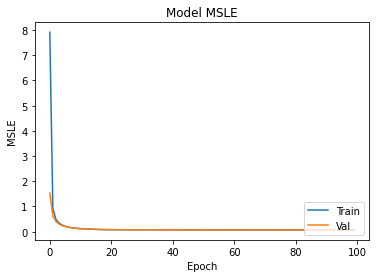

In [88]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [89]:
# Predict the va;idation set
prediction = model.predict(X_val)

# Calculate the absolute errors
error = prediction - Y_val[0]
error = [abs(x) for x in error]

# Print out the mean absolute error (mae)
np.mean(error)

171/171 [==============================] - 0s 2ms/step


KeyError: 0

In [10]:
# calculate the absolute errors of baseline model
y_mode = mode(Y_val)
baseline_error = [abs(y_mode - x) for x in Y_val]
np.mean(baseline_error)

90.1511234150465

In [112]:
post_data = new_data.iloc[:,1:]
post_data.insert(0, "Postcode", postcode)

In [113]:
post_data

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Postcode_3000,Postcode_3002,Postcode_3004,Postcode_3008,...,Postcode_3975,Postcode_3977,Postcode_3978,Postcode_3980,Postcode_3981,Postcode_3984,Postcode_3987,Postcode_3992,Postcode_3995,Postcode_3996
0,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3000,1,34652.148872,4.0,45.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36396,3996,1,36889.657143,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36397,3996,1,36889.657143,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36398,3996,2,36889.657143,0.0,0.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [142]:
# Update population in 2023/223/2025
pop = pd.read_csv("../data/curated/predicted_population.csv")
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

pop_2023 = pd.merge(pop_2023, post_data, how = 'inner', on = ['Postcode'])
pop_2023 = pop_2023.drop(labels = ['Population'],axis = 1) 
pop_2023 = pop_2023.iloc[:,1:]

pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis = 0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(7, 'Pred_2023', pred_2023)

pop_2024 = pd.merge(pop_2024, post_data, how = 'inner', on = ['Postcode'])
pop_2024 =pop_2024.drop(labels = ['Population'],axis = 1) 
pop_2024 = pop_2024.iloc[:,1:]

pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(8, 'Pred_2024', pred_2024)

pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'], axis=1) 
pop_2025 = pop_2025.iloc[:,1:]

pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(9, 'Pred_2025', pred_2025)

1138/1138 [==============================] - 1s 1ms/step


In [145]:
# Calculate growth rate
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data = data[["Postcode", "Weekly Rental Price", "Pred_2023", "Pred_2024", "Pred_2025", "rate_2023", "rate_2024", "rate_2025"]]


In [146]:
# Group by the data by the postcode
data = data.groupby(by = ['Postcode']).mean()
data = data.sort_values(by = ['rate_2023'], ascending = False)
data = data.head(10)
data.to_csv("../data/curated/NNpredi.csv")